In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
xls = pd.ExcelFile('nba_draft.xlsx')

map = {}
for sheet_name in xls.sheet_names:
    map[sheet_name] = xls.parse(sheet_name)

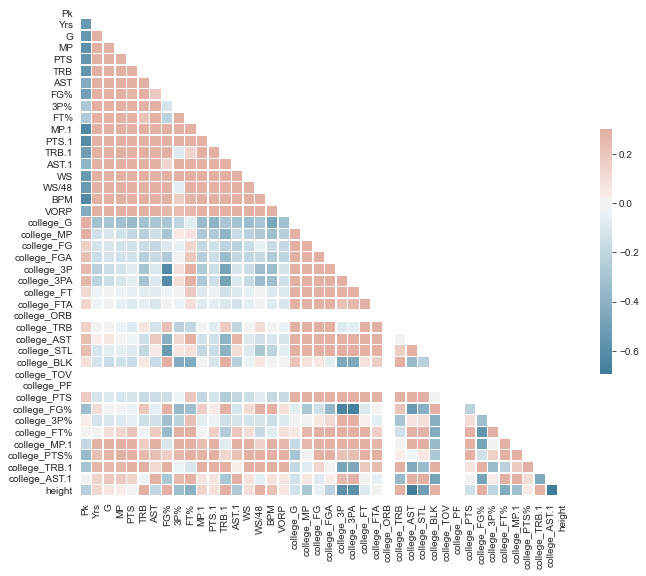

In [3]:
x = map['draft_data_2007']
corr = x.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the above visualization we can see the relationship between different variables in our 2007 dataset. The darker the hue is, the greater correlation. Further inspection into the other years yields relatively similar findings.

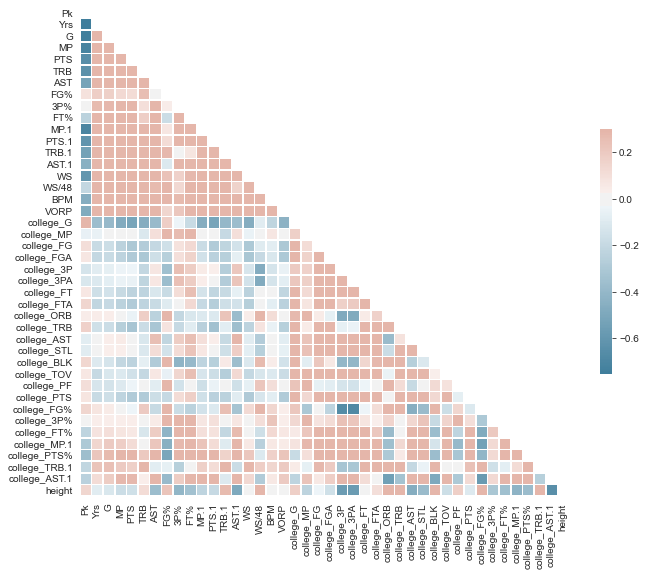

In [4]:
y = map['draft_data_2010']
corr = y.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [5]:
import sklearn
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [6]:
x.head(5)

,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,...,college_3P%,college_FT%,college_MP.1,college_PTS%,college_TRB.1,college_AST.1,height,weight,date_of_birth,place_of_birth
0,1,POR,Greg Oden,Ohio State,3,105,2028,840,656,51,...,NaN,0.628,28.9,15.7,9.6,0.7,7.000000,250lb,"January 22, 1988",New York
1,2,SEA,Kevin Durant,Texas,12,849,31305,22940,5992,3486,...,0.404,0.816,35.9,25.8,11.1,1.3,6.833333,240lb,"September 29, 1988",District of Columbia
2,3,ATL,Al Horford,Florida,13,853,27810,11890,7053,2818,...,0.000,0.619,25.7,10.3,7.9,1.7,6.750000,240lb,"June 3, 1986",Dominican Republic
3,4,MEM,Mike Conley,Ohio State,13,835,27063,12408,2478,4717,...,0.304,0.694,31.6,11.3,3.4,6.1,6.083333,175lb,"October 11, 1987",Arkansas
4,5,BOS,Jeff Green,Georgetown,12,908,26779,11773,4008,1421,...,0.359,0.700,33.2,13.1,6.5,3.1,6.666667,235lb,"August 28, 1986",Maryland


In [7]:
X_multi = x.drop('')
Y_target = x['']

KeyError: "[''] not found in axis"